In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bot.csv to bot.csv
User uploaded file "bot.csv" with length 39842436 bytes


In [ ]:
df = pd.read_csv("bot.csv")

In [ ]:
df = df[['Handles', 'Content', 'SourceatBot7']]
df

,Handles,Content,SourceatBot7
0,wittyplease,RT @Dax_x98: Lady Gaga - 35M to COVID-19 relie...,Human
1,nicktompan,Facing COVID-19 More Successfully: Meditation ...,Bot
2,Passion4USA,RT @MurkyMoodRing: The idiots you would expect...,Bot
3,Garvald2,RT @NicolaSturgeon: STAY HOME. PROTECT THE NHS...,Human
4,iammattgonzales,RT @Dax_x98: Lady Gaga - 35M to COVID-19 relie...,Human
...,...,...,...
119995,nellstra,RT @ASPertierra: Correct. https://www.thenatio...,Human
119996,LloydMack16,RT @stacy_redvirgo: There is reason to doubt t...,Bot
119997,jetjocko,RT @MeganMolteni: @jetjocko Important for peop...,Human
119998,markjuelich,This Nonprofit Empowers the African American C...,Bot


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df['Content'])
mydict = vectorizer.vocabulary_
print(len(mydict))
# print(vectorizer.vocabulary_['COVID'])
print(dict(list(mydict.items())[0:2]))
# encode document
vector = vectorizer.transform(df['Content'])
# # summarize encoded vector
print(vector.shape)
print(type(vector))
# print(vector.toarray())

157784
{'rt': 126007, 'dax_x98': 53875}
(120000, 157784)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
X = vector
# X = np.asarray(vector)
y = 1*(df['SourceatBot7'] == 'Bot').to_numpy() # Bot = 1, Human = 0
# print(X[0])
# print(X.shape)
print(y)
print(y.shape)
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

[0 1 1 ... 0 1 0]
(120000,)
93289
26711


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
# gnb = GaussianNB()
gnb = BernoulliNB(alpha=.01)
gnb.fit(X_train, y_train)
print("Acc: ",format(gnb.score(X_test, y_test),".4f"))

Acc:  0.7074


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
def classifier(clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('='*80)
  print(clf)
  print('='*80)
  acc = accuracy_score(y_pred, y_test)
  print('Acc:', format(acc,".4f"))
  print('CM:\n', confusion_matrix(y_test, y_pred))
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn+fp)
  print('specificity:\n',specificity)
  sensitivity = tp / (tp+fn)
  print('sensitivity:\n',sensitivity)


  acc_list.append(acc)
  return acc

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import RidgeClassifier, Perceptron, PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC

acc_list = []

classifier(BernoulliNB(alpha=.01))
classifier(MultinomialNB(alpha=.01))
classifier(KNeighborsClassifier(n_neighbors=2))
# classifier(KNeighborsClassifier(n_neighbors=10))
classifier(NearestCentroid())
classifier(RidgeClassifier())
classifier(Perceptron())
classifier(PassiveAggressiveClassifier())
classifier(LogisticRegression())
classifier(LinearSVC())
classifier(SGDClassifier())
print(acc_list)

BernoulliNB(alpha=0.01)
Acc: 0.7074
CM:
 [[10469  3485]
 [ 1781  2265]]
specificity:
 0.7502508241364483
sensitivity:
 0.5598121601581809
MultinomialNB(alpha=0.01)
Acc: 0.7062
CM:
 [[10466  3488]
 [ 1801  2245]]
specificity:
 0.7500358320194926
sensitivity:
 0.5548690064260998
KNeighborsClassifier(n_neighbors=2)
Acc: 0.7709
CM:
 [[13472   482]
 [ 3641   405]]
specificity:
 0.9654579332091157
sensitivity:
 0.10009886307464162
NearestCentroid()
Acc: 0.5943
CM:
 [[8486 5468]
 [1834 2212]]
specificity:
 0.608141034828723
sensitivity:
 0.5467128027681661
RidgeClassifier()
Acc: 0.7642
CM:
 [[12518  1436]
 [ 2809  1237]]
specificity:
 0.8970904400171994
sensitivity:
 0.305734058329214
Perceptron()
Acc: 0.7387
CM:
 [[11905  2049]
 [ 2655  1391]]
specificity:
 0.853160384119249
sensitivity:
 0.34379634206623827
PassiveAggressiveClassifier()
Acc: 0.7553
CM:
 [[12457  1497]
 [ 2907  1139]]
specificity:
 0.8927189336390999
sensitivity:
 0.2815126050420168


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()
Acc: 0.7726
CM:
 [[12823  1131]
 [ 2962  1084]]
specificity:
 0.9189479719076967
sensitivity:
 0.2679189322787939


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()
Acc: 0.7527
CM:
 [[12207  1747]
 [ 2705  1341]]
specificity:
 0.8748029238927906
sensitivity:
 0.3314384577360356
SGDClassifier()
Acc: 0.7877
CM:
 [[13394   560]
 [ 3261   785]]
specificity:
 0.9598681381682672
sensitivity:
 0.1940187839841819
[0.7074444444444444, 0.7061666666666667, 0.7709444444444444, 0.5943333333333334, 0.7641666666666667, 0.7386666666666667, 0.7553333333333333, 0.7726111111111111, 0.7526666666666667, 0.7877222222222222]


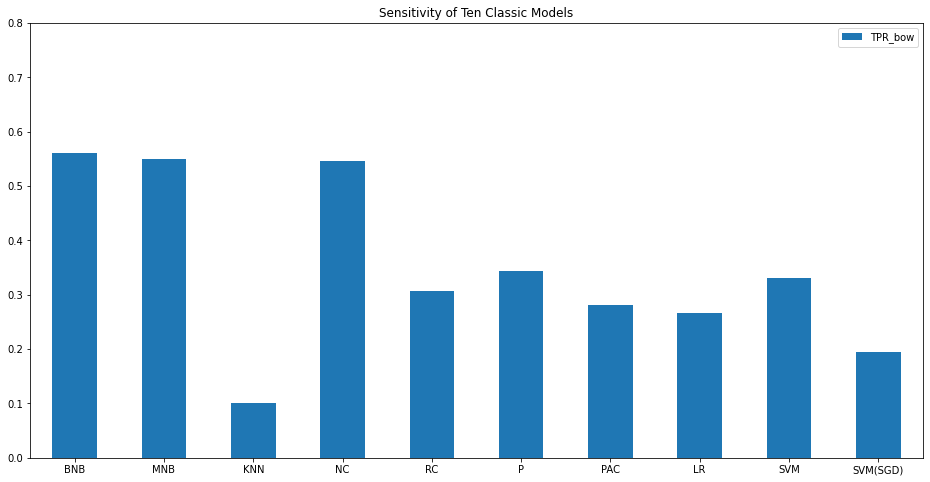

In [ ]:
import pandas as pd

''' <Classifier>
BNB: Bernoulli Naive Bayes
MNB: Multinomial Naive Bayes
KNN: K-Nearest Neighbours
NC: NearestCentroid
RC: Ridge Regression
P: Perceptron
PAC: PassiveAggressiveClassifier
LR: Logistic Regression
SVM: linear SVM using liblinear algorithm
SVM(SGD): linear SVM using SGD algorithm
'''
''' <Featurization>
BOWx: Bag of Word w/o data preprocessing
BOW: Bag of Word w/ data preprocessing
TF-IDF w/ data preprocessing
'''
TPR_bow = [0.56, 0.55, 0.1, 0.546, 0.306, 0.344, 0.281, 0.267, 0.33, 0.194]
index = ['BNB', 'MNB', 'KNN', 'NC', 'RC', 'P', 'PAC', 'LR', 'SVM', 'SVM(SGD)']
df = pd.DataFrame({'TPR_bow': TPR_bow}, index=index)
ax = df.plot.bar(rot=0, figsize=(16, 8),title= 'Sensitivity of Ten Classic Models')
ax.set_ylim(bottom=0, top=0.8)
ax

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

In [ ]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv("Processed.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df['Handles'] = df['Handles'].astype("string")

In [ ]:
type(df['Handles'])

### Visualization